In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading Dataset

In [4]:
user_data = pd.read_csv("userbehaviour.csv")
user_data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


# Checking for null values

In [6]:
user_data.isnull().sum()

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

# Column Information

In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


# Descriptive Statistics

In [10]:
user_data.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


# Highest, Lowest, and Average "SCREEN TIME"

In [12]:
highest_screen_time = user_data['Average Screen Time'].max()
lowest_screen_time = user_data['Average Screen Time'].min()
average_screen_time = user_data['Average Screen Time'].mean()

highest_screen_time, lowest_screen_time, average_screen_time

(50.0, 0.0, 24.39039039039039)

# Highest, Lowest, and Average "AMOUNT SPENT"

In [20]:
highest_spent = user_data['Average Spent on App (INR)'].max()
lowest_spent = user_data['Average Spent on App (INR)'].min()
average_spent = user_data['Average Spent on App (INR)'].mean()

highest_spent, lowest_spent, average_spent

(998.0, 0.0, 424.4154154154154)

# Relationship between spending capacity and screen time of "ACTIVE" and "UNINSTALLED USERS"

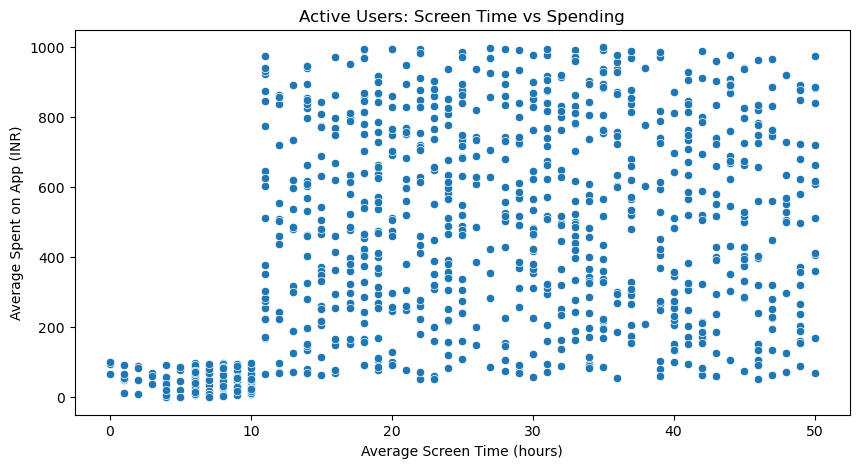

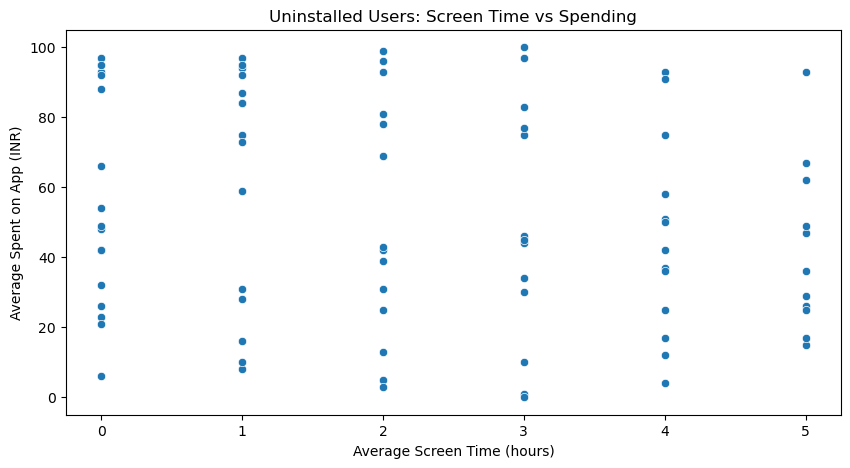

In [22]:
user_data['Status'] = user_data['Status'].str.lower()
active_users = user_data[user_data['Status'] == 'installed']
uninstalled_users = user_data[user_data['Status'] == 'uninstalled']

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=active_users)
plt.title('Active Users: Screen Time vs Spending')
plt.xlabel('Average Screen Time (hours)')
plt.ylabel('Average Spent on App (INR)')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', data=uninstalled_users)
plt.title('Uninstalled Users: Screen Time vs Spending')
plt.xlabel('Average Screen Time (hours)')
plt.ylabel('Average Spent on App (INR)')
plt.show()

# Relationship between ratings and average screen time

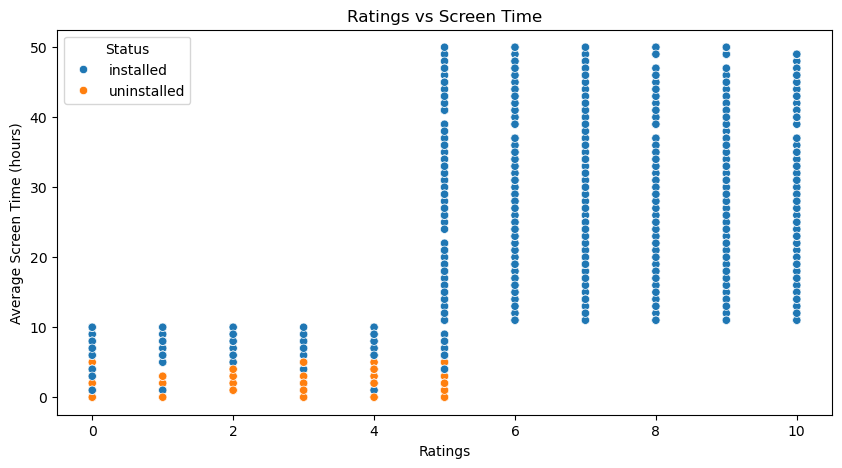

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Ratings', y='Average Screen Time', hue='Status', data=user_data)
plt.title('Ratings vs Screen Time')
plt.xlabel('Ratings')
plt.ylabel('Average Screen Time (hours)')
plt.legend(title='Status')
plt.show()

In [26]:
features = user_data[['Average Screen Time', 'Average Spent on App (INR)', 'Ratings', 'New Password Request', 'Last Visited Minutes']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=0)
user_data['Segment'] = kmeans.fit_predict(scaled_features)

# Visualizing the segments

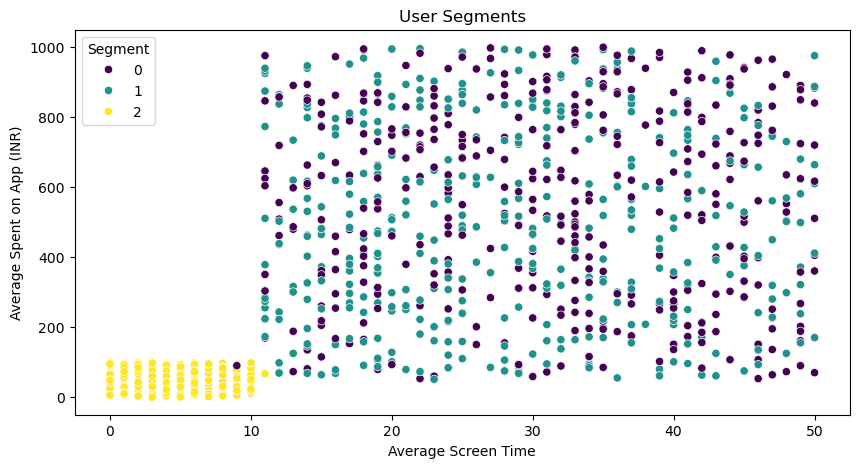

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Average Screen Time', y='Average Spent on App (INR)', hue='Segment', data=user_data, palette='viridis')
plt.title('User Segments')
plt.show()